
<a href="https://colab.research.google.com/github/pr0fez/AI23-Deep_learning/blob/main/Exercises/E1-MLP_image_classification.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# Multilayered perceptron (MLP) image classification exercises 

---
These are introductory exercises in Deep learning with focus in **MLP** for image classification.

<p class = "alert alert-info" role="alert"><b>Note</b> that sometimes you don't get exactly the same answer as I get, but it doesn't neccessarily mean it is wrong. Could be some parameters, randomization, that we have different. Also very important is that in the future there won't be any answer sheets, use your skills in data analysis, mathematics and statistics to back up your work.</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 0. Fashion dataset (*)

Zalando has provided an MNIST dataset for fashion, with the format very similar to the original MNIST digits dataset. Start with loading this fashion dataset from TensorFlow Keras. 

&nbsp; a) Start visualizing some of the sample images 

&nbsp; b) Normalize the images to values between 0 and 1 

&nbsp; c) Visualize same images as before, do you see any difference? 

&nbsp; d) Make histogram of a sample image before and after normalization. What do you notice? 

&nbsp; e) Check if the dataset is balanced.

<details>

<summary>Hint</summary>

</details>

<details>

<summary>Answer</summary>

No answers here, discuss with your fellow data scientists to move forward if you're stuck.


</details>

---

## 1. MLP architecture (*)

As we know from the lectures, there are no certain mathematical rules for choosing number of nodes and hidden layers. What we can do is to do trial and error, but it would be expensive to not have any guidelines. Look at this [video](https://www.youtube.com/watch?v=bqBRET7tbiQ) and this [blog article ](https://towardsdatascience.com/17-rules-of-thumb-for-building-a-neural-network-93356f9930af) for rule of thumbs. Note that this will be computationally expensive on your laptop for larger networks and higher resolution images. Log in to kaggle and create a jupyter notebook inside kaggle and enable GPU. Remember to shut off the GPU after you're done with your work, you get a certain amount of quotas every week. 

&nbsp; a) Create a network with no hidden layers, fit the model for 50 epochs. Use 10000 samples for validation. 

&nbsp; b) Plot training loss vs validation loss and accuracy against validation accuracy. 

&nbsp; c) Repeat a) and b) for hidden_layers $\in \{1,2,3\}$

&nbsp; d) Add dropout layers and choose a rate of dropout, and perform a few experiments. Note that you shouldn't add dropout layers after input layer and after output layer. 

&nbsp; f) Define an experiment you want to investigate and perform it.

&nbsp; g) Choose a model from your experiments. 


<details>

<summary>Hint</summary>

d) Hidden layers are used to decrease overfitting. Can you see how it impacts your loss curves?

</details>

<details>

<summary>Answer</summary>

No answers here, discuss with your fellow data scientists to move forward if you're stuck.


</details>

---

## 2. Predict and evaluate (*)

Use the model you've chosen from 1. and train on all training data. Also add early stopping to further avoid overfitting. Predict on the test data and evaluate your model.

&nbsp; a) Which item was hardest to classify? Do you have any ideas of why?

&nbsp; b) Show a few samples from each category that was misclassified.

&nbsp; c) Create a folder through Python called Misclassified and save the misclassified images there. 

<details>

<summary>Answer</summary>

No answers here, discuss with your fellow data scientists to move forward if you're stuck.


</details>


---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---

In [259]:
# Zalando has provided an MNIST dataset for fashion, with the format very similar to the original MNIST digits dataset. Start with loading this fashion dataset from TensorFlow Keras. 

import tensorflow as tf
import keras
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist


In [260]:
# train test val split on fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# split the training data into training and validation sets
from sklearn.model_selection import train_test_split

train_images_val, val_images, train_labels_val, val_labels = train_test_split(train_images, train_labels, test_size=1/6, random_state=42)


In [261]:
train_images.shape, train_images_val.shape, test_images.shape, val_images.shape

((60000, 28, 28), (50000, 28, 28), (10000, 28, 28), (10000, 28, 28))

In [262]:
# train_images = train_images.reshape([60000, 28*28])
# train_images = train_images.astype('float32') / 255
# # validation
# train_images_val = train_images_val.reshape([50000, 28*28])
# train_images_val = train_images_val.astype('float32') / 255
# # test
# test_images = test_images.reshape([10000, 28*28])
# test_images = test_images.astype('float32') / 255
# # validation
# val_images = val_images.reshape([10000, 28*28])
# val_images = val_images.astype('float32') / 255

# train_images.shape, test_images.shape, val_images.shape 

&nbsp; a) Start visualizing some of the sample images 

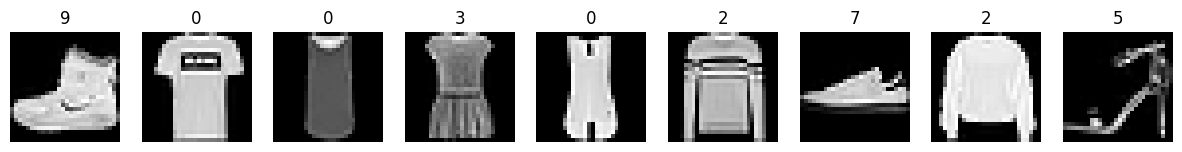

In [263]:
fig, axes = plt.subplots(1, 9, figsize=(15, 5))

for ax, image, label in zip(axes, train_images[:9], train_labels[:9]):
    ax.imshow(image, cmap='gray')
    ax.set_title(label)
    ax.axis('off')

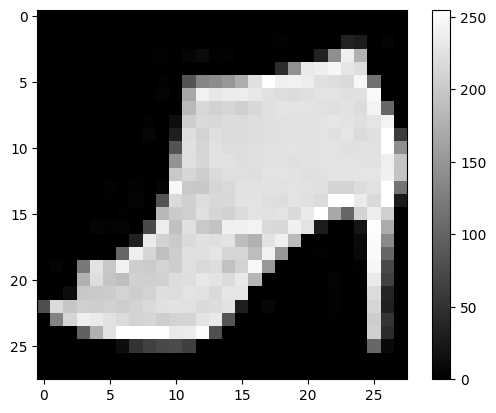

In [264]:
#visualizing some of the sample images 
plt.figure()
plt.imshow(train_images[79], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()


In [265]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

&nbsp; b) Normalize the images to values between 0 and 1 

In [266]:
# b) Normalize the images to values between 0 and 1 
train_images_norm = train_images / 255.0
test_images_norm = test_images / 255.0


&nbsp; c) Visualize same images as before, do you see any difference? 


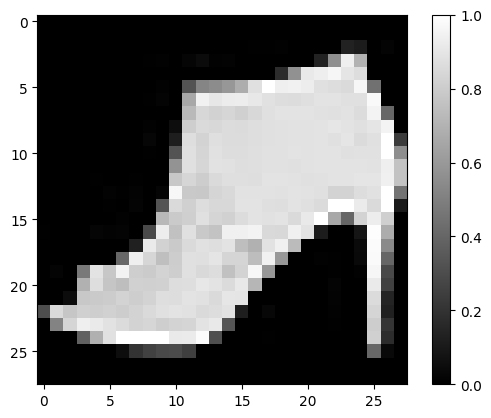

In [267]:
#visualizing some of the sample images 
plt.figure()
plt.imshow(train_images_norm[79], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()


&nbsp; d) Make histogram of a sample image before and after normalization. What do you notice? 



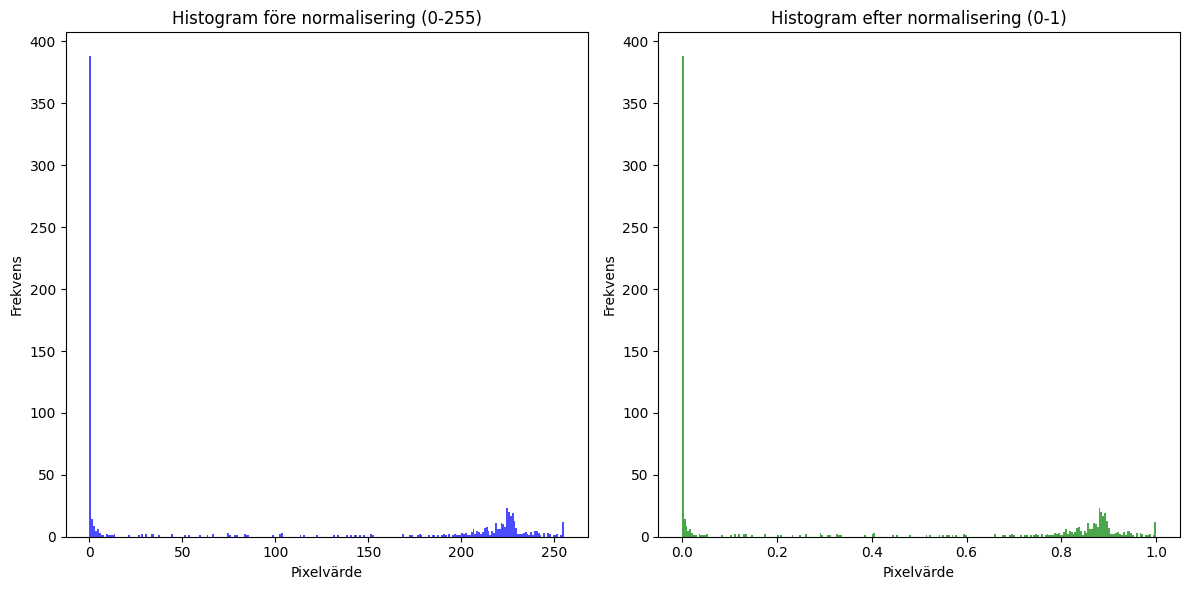

In [268]:
import matplotlib.pyplot as plt

# Välj en bild (t.ex. första bilden i träningsuppsättningen)
sample_image = train_images[79]

# 1. Histogram innan normalisering (råa pixelvärden mellan 0-255)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # Första subploten
plt.hist(sample_image.flatten(), bins=255, range=(0, 255), color='blue', alpha=0.7)
plt.title("Histogram före normalisering (0-255)")
plt.xlabel("Pixelvärde")
plt.ylabel("Frekvens")

# 2. Normalisera bilden till 0-1
normalized_image = sample_image / 255.0

# Histogram efter normalisering (pixelvärden mellan 0-1)
plt.subplot(1, 2, 2)  # Andra subploten
plt.hist(normalized_image.flatten(), bins=255, range=(0, 1), color='green', alpha=0.7)
plt.title("Histogram efter normalisering (0-1)")
plt.xlabel("Pixelvärde")
plt.ylabel("Frekvens")

# Visa plotten
plt.tight_layout()
plt.show()



&nbsp; e) Check if the dataset is balanced.

In [ ]:
# check number of classes
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
# check number of values in each class
np.bincount(test_labels)
#

array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
      dtype=int64)

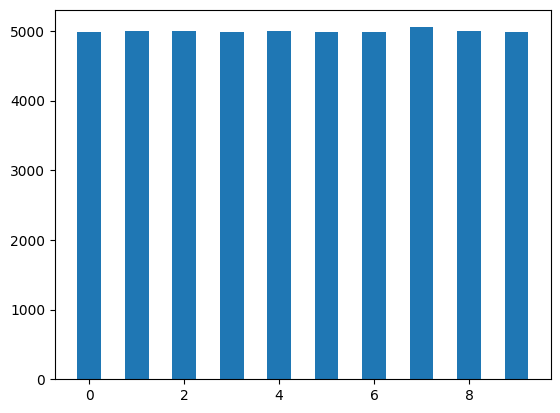

In [ ]:
# plot bincount, with some space in every bar
plt.figure()
plt.bar(np.unique(train_labels), np.bincount(train_labels), width=0.5)
plt.show()
# plt.hist(train_labels, bins=10)
# plt.show()


# 1. MLP architecture (*)

&nbsp; a) Create a network with no hidden layers, fit the model for 50 epochs. Use 10000 samples for validation. 

&nbsp; b) Plot training loss vs validation loss and accuracy against validation accuracy. 

&nbsp; c) Repeat a) and b) for hidden_layers $\in \{1,2,3\}$

&nbsp; d) Add dropout layers and choose a rate of dropout, and perform a few experiments. Note that you shouldn't add dropout layers after input layer and after output layer. 

&nbsp; f) Define an experiment you want to investigate and perform it.

&nbsp; g) Choose a model from your experiments. 



---

In [269]:
train_images = train_images.reshape([60000, 28*28])
train_images = train_images.astype('float32') / 255
# validation
train_images_val = train_images_val.reshape([50000, 28*28])
train_images_val = train_images_val.astype('float32') / 255
# test
test_images = test_images.reshape([10000, 28*28])
test_images = test_images.astype('float32') / 255
# validation
val_images = val_images.reshape([10000, 28*28])
val_images = val_images.astype('float32') / 255

train_images.shape, test_images.shape, val_images.shape 

((60000, 784), (10000, 784), (10000, 784))

In [270]:
from keras import layers

shallow_model = keras.models.Sequential([
    #layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

shallow_model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
shallow_model.summary()


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [271]:
shallow_model.fit(train_images_val, train_labels_val, epochs=50, validation_data=(val_images, val_labels))
# model.fit(scaled_X_train_val, y_train_val, epochs=1000, verbose=0, validation_data=(scaled_X_val, y_val))

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7449 - loss: 0.7586 - val_accuracy: 0.8209 - val_loss: 0.5174
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8386 - loss: 0.4754 - val_accuracy: 0.8236 - val_loss: 0.5063
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8476 - loss: 0.4497 - val_accuracy: 0.8442 - val_loss: 0.4563
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8543 - loss: 0.4336 - val_accuracy: 0.8474 - val_loss: 0.4452
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8534 - loss: 0.4320 - val_accuracy: 0.8473 - val_loss: 0.4404
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8578 - loss: 0.4221 - val_accuracy: 0.8476 - val_loss: 0.4431
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8608 - loss: 0.4132 - val_accuracy: 0.8508 - val_loss: 0.4371
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8593 - loss: 0.4150 

In [272]:
shallow_model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,702 (61.34 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,852 (30.68 KB)

In [273]:
shallow_model.history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

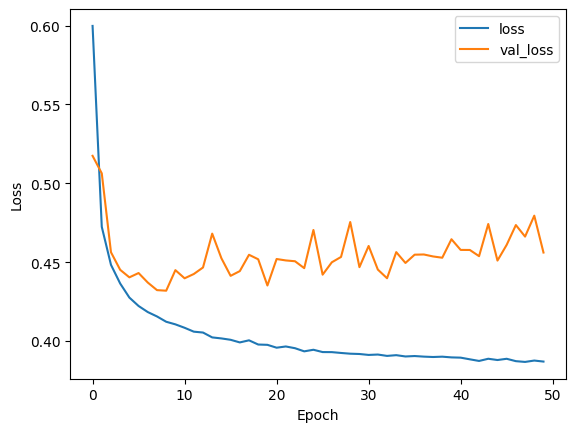

In [274]:
# Plot the training and validation loss
plt.plot(shallow_model.history.history['loss'], label='loss')
plt.plot(shallow_model.history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


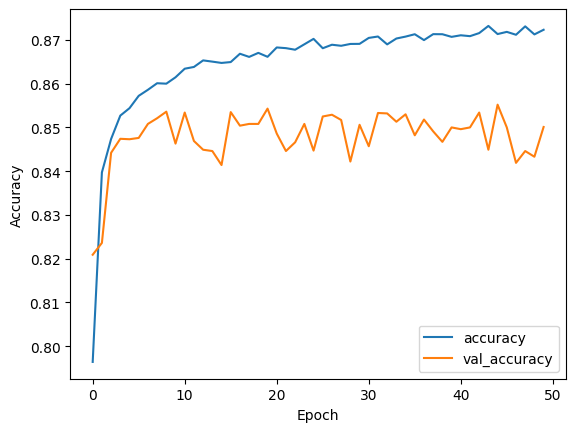

In [275]:
# Plot the training and validation accuracy with plotly express
plt.plot(shallow_model.history.history['accuracy'], label='accuracy')
plt.plot(shallow_model.history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


In [276]:
import plotly.express as px
import pandas as pd

# Create a DataFrame from the training and validation loss history
history_data = {
    'Epoch': list(range(1, len(shallow_model.history.history['loss']) + 1)),
    'Loss': shallow_model.history.history['loss'],
    'Validation Loss': shallow_model.history.history['val_loss']
}

history_df = pd.DataFrame(history_data)

# Create the plot using Plotly Express
fig = px.line(history_df, x='Epoch', y=['Loss', 'Validation Loss'], 
              labels={'Epoch': 'Epoch', 'value': 'Loss'}, 
              title="Loss vs Epochs")
fig.update_layout(
    legend_title="Loss Type",
    xaxis_title="Epoch",
    yaxis_title="Loss"
)

# Show the plot
fig.show()


In [277]:
from keras import layers

model_1 = keras.models.Sequential([
    layers.Dense(50, activation='relu'),
    layers.Dense(25, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_1.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_1.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [278]:
model_1.fit(train_images_val, train_labels_val, epochs=10, validation_data=(val_images, val_labels))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7418 - loss: 0.7574 - val_accuracy: 0.8532 - val_loss: 0.4231
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8502 - loss: 0.4214 - val_accuracy: 0.8579 - val_loss: 0.4052
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8668 - loss: 0.3704 - val_accuracy: 0.8687 - val_loss: 0.3769
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8778 - loss: 0.3465 - val_accuracy: 0.8654 - val_loss: 0.3773
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8789 - loss: 0.3348 - val_accuracy: 0.8701 - val_loss: 0.3641
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8849 - loss: 0.3164 - val_accuracy: 0.8776 - val_loss: 0.3502
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8879 - loss: 0.3118 - val_accuracy: 0.8744 - val_loss: 0.3724
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8905 - loss: 0.3018 -

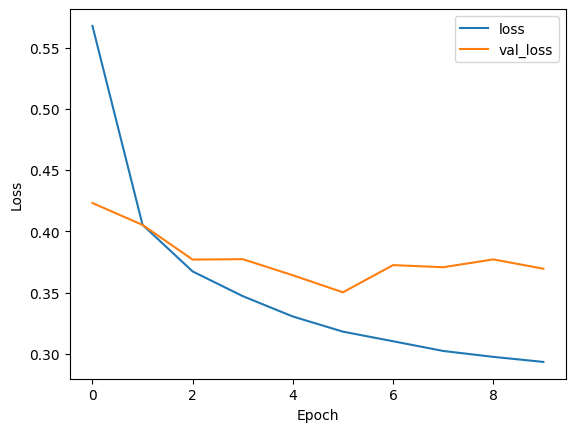

In [279]:
# Plot the training and validation loss
plt.plot(model_1.history.history['loss'], label='loss')
plt.plot(model_1.history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [280]:
import plotly.express as px
import pandas as pd

# Create a DataFrame from the training and validation loss history
history_data = {
    'Epoch': list(range(1, len(model_1.history.history['loss']) + 1)),
    'Loss': model_1.history.history['loss'],
    'Validation Loss': model_1.history.history['val_loss']
}

history_df = pd.DataFrame(history_data)

# Create the plot using Plotly Express
fig = px.line(history_df, x='Epoch', y=['Loss', 'Validation Loss'], 
              labels={'Epoch': 'Epoch', 'value': 'Loss'}, 
              title="Loss vs Epochs")
fig.update_layout(
    legend_title="Loss Type",
    xaxis_title="Epoch",
    yaxis_title="Loss"
)

# Show the plot
fig.show()